<h1>Оглавление<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Цель-и-описание-проекта" data-toc-modified-id="Цель-и-описание-проекта-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Цель и описание проекта</a></span></li><li><span><a href="#Изучение-и-предобработка-данных-из-файлов" data-toc-modified-id="Изучение-и-предобработка-данных-из-файлов-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Изучение и предобработка данных из файлов</a></span><li><span><a href="#Расчёты-и-добавление-результатов" data-toc-modified-id="Расчёты-и-добавление-результатов-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов</a></span><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка гипотез</a></span><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Определение выгодного тарифа для телеком-компании

## Цель и описание проекта

**Цель проекта:** Проанализировать поведение клиентов федерального сотового оператора за 2018 г. в рамкаха двух тарифных планов: «Смарт» и «Ультра» и сделать вывод — какой тарифный план лучше.

**Данные для анализ:** выборка данных по 500 пользователей за 2018г.

**Тарифы** (минуты и мегабайты округляются вверх до целого)

«Смарт»
- Ежемесячная плата: 550 рублей
- Включено: 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
- Стоимость услуг сверх тарифного пакета: минута разговора 3 рубля, сообщение 3 рубля, 1 Гб интернет-трафика 200 рублей.

«Ультра»
- Ежемесячная плата: 1950 рублей
- Включено: 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
- Стоимость услуг сверх тарифного пакета: минута разговора 1 рубль, сообщение 1 рубль, 1 Гб интернет-трафика 150 рублей.

## Изучение и предобработка данных из файлов

In [1]:
# импортируем библиотеки и делаем настройки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from scipy import stats as st

pd.set_option('display.max_columns', None)

In [2]:
mb_to_gb = 1024

In [3]:
#через цикл загружаем файлы и выводим на экран, в т.ч. применяем метод info()

datasets = ['calls', 'internet', 'messages', 'tariffs', 'users']

for dataset in datasets:
    files = glob.glob('/datasets/' + dataset + '.csv')
    for file in files:
        globals()[dataset] = pd.read_csv(file)
        globals()[dataset].info()
        display(globals()[dataset])
        print('-----------------------------------------------')  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499


-----------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...,...
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,1246.32,2018-11-26,1499


-----------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
...,...,...,...
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499


-----------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


-----------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


-----------------------------------------------


In [4]:
def to_datetime_type(dataset, col): #функция для изменения формата данных на datetime64[ns]
    dataset[col]  = pd.to_datetime(dataset[col], format='%Y-%m-%d')
    
def copy_column(dataset, col): #функция для копирования столбца в новый с именем 'month'
    dataset['month'] = dataset[col]    

In [5]:
#через цикл пременяем функции к фреймам и столбцам из словаря, выводим на экран info()

date_cols = {'calls' : 'call_date', 'internet' : 'session_date', 'messages' : 'message_date'}

for key in date_cols:
    to_datetime_type(globals()[key], date_cols[key])
    copy_column(globals()[key], date_cols[key])
    globals()[key].info()
    print('------------------------------------------')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 5 columns):
id           202607 non-null object
call_date    202607 non-null datetime64[ns]
duration     202607 non-null float64
user_id      202607 non-null int64
month        202607 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(1)
memory usage: 7.7+ MB
------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 6 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int64
month           149396 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(2), object(1)
memory usage: 6.8+ MB
------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data colu

In [6]:
users['reg_date']  = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 31.4+ KB


**Вывод**

Все 5 файлов прочитаны и загружены в Pandas.
Для всех фреймов по всем столбцам, содержащим дату, изменены форматы данных - с object на datetime64.
Данные не содержат видимых ошибок.

## Расчёты и добавление результатов

На основе фрейма calls создаем новый фрейм данных calls_grouped, куда помещаем сгруппированные по 'user_id' и 'month' данные, рассчитав общее кол-во звонков и их продолжительность по месяцам по каждому абоненту.

In [7]:
calls['duration_rouned'] = np.ceil(calls['duration']).astype(int) #округляем каждый звонок до целых минут вверх

calls_grouped = calls.groupby(['user_id', pd.Grouper(key='month', freq='M')]).agg({'duration_rouned':['count', 'sum']})
#группируем данные по 'user_id' и 'month' и 
#рассчитываем общее кол-во звонков и их продолжительность по месяцам по каждому абоненту

calls_grouped.columns = ['calls_qty', 'minutes_qty'] #избавляемся от мультииндекса путем переименования столбцов
calls_grouped = calls_grouped.reset_index() #сбрасываем индексы
calls_grouped

,user_id,month,calls_qty,minutes_qty
0,1000,2018-05-31,22,159
1,1000,2018-06-30,43,172
2,1000,2018-07-31,47,340
3,1000,2018-08-31,52,408
4,1000,2018-09-30,58,466
...,...,...,...,...
3169,1498,2018-10-31,41,247
3170,1499,2018-09-30,9,70
3171,1499,2018-10-31,68,449
3172,1499,2018-11-30,74,612


На основе фрейма internet создаем новый фрейм данных internet_grouped, куда помещаем сгруппированные по 'user_id' и 'month' данные, рассчитав общий дата трафик в Гб по месяцам по каждому абоненту.

In [8]:
internet_grouped = internet.groupby(['user_id', pd.Grouper(key='month', freq='M')]).agg({'mb_used':'sum'}).reset_index()
#группируем данные по 'user_id' и 'month' и 
#рассчитываем общий дата трафик по месяцам по каждому абоненту

internet_grouped['gb_used'] = np.ceil(internet_grouped['mb_used'] / mb_to_gb).astype(int)
#трафик округляем до целый Гб вверх

internet_grouped

,user_id,month,mb_used,gb_used
0,1000,2018-05-31,2253.49,3
1,1000,2018-06-30,23233.77,23
2,1000,2018-07-31,14003.64,14
3,1000,2018-08-31,14055.93,14
4,1000,2018-09-30,14568.91,15
...,...,...,...,...
3198,1498,2018-10-31,20579.36,21
3199,1499,2018-09-30,1845.75,2
3200,1499,2018-10-31,17788.51,18
3201,1499,2018-11-30,17963.31,18


На основе фрейма messages создаем новый фрейм данных messages_grouped, куда помещаем сгруппированные по 'user_id' и 'month' данные, рассчитав общий кол-во SMS по месяцам по каждому абоненту.

In [9]:
messages_grouped = messages.groupby(['user_id', pd.Grouper(key='month', freq='M')]).agg({'month':'count'})
#группируем данные по 'user_id' и 'month' и 
#рассчитываем кол-во SMS по месяцам по каждому абоненту

messages_grouped.columns = ['messages_qty'] 
messages_grouped = messages_grouped.reset_index()
messages_grouped

,user_id,month,messages_qty
0,1000,2018-05-31,22
1,1000,2018-06-30,60
2,1000,2018-07-31,75
3,1000,2018-08-31,81
4,1000,2018-09-30,57
...,...,...,...
2712,1498,2018-10-31,42
2713,1499,2018-09-30,11
2714,1499,2018-10-31,48
2715,1499,2018-11-30,59


Объединяем все три фрейма - calls_grouped, internet_grouped, messages_grouped - в один методом merge() по 'user_id' и 'month'.

In [10]:
df = calls_grouped.merge(internet_grouped, on=['user_id', 'month'], how='outer').merge(messages_grouped, on=['user_id', 'month'], how='outer')
df

,user_id,month,calls_qty,minutes_qty,mb_used,gb_used,messages_qty
0,1000,2018-05-31,22.0,159.0,2253.49,3.0,22.0
1,1000,2018-06-30,43.0,172.0,23233.77,23.0,60.0
2,1000,2018-07-31,47.0,340.0,14003.64,14.0,75.0
3,1000,2018-08-31,52.0,408.0,14055.93,14.0,81.0
4,1000,2018-09-30,58.0,466.0,14568.91,15.0,57.0
...,...,...,...,...,...,...,...
3209,1489,2018-08-31,NaN,NaN,11050.56,11.0,17.0
3210,1489,2018-09-30,NaN,NaN,17206.30,17.0,32.0
3211,1489,2018-10-31,NaN,NaN,19559.44,20.0,21.0
3212,1489,2018-11-30,NaN,NaN,17491.56,18.0,20.0


In [11]:
df.info() #выводим Info() по объединенному фрейму

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 7 columns):
user_id         3214 non-null int64
month           3214 non-null datetime64[ns]
calls_qty       3174 non-null float64
minutes_qty     3174 non-null float64
mb_used         3203 non-null float64
gb_used         3203 non-null float64
messages_qty    2717 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 200.9 KB


Пустые значения в колонках с данными заменяем на 0, поскольку это говорит о том, что в конкретном месяце абонент не пользовался определенным видом трафика - не разговаривал голосом, или не посылал SMS, или не использовал мобильные данные.

In [12]:
isnull_col_list = ['calls_qty', 'minutes_qty', 'mb_used', 'gb_used', 'messages_qty']

for isnull_col in isnull_col_list:
    df[isnull_col] = df[isnull_col].fillna(0)
    
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 7 columns):
user_id         3214 non-null int64
month           3214 non-null datetime64[ns]
calls_qty       3214 non-null float64
minutes_qty     3214 non-null float64
mb_used         3214 non-null float64
gb_used         3214 non-null float64
messages_qty    3214 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 200.9 KB


В объединенный фрейм добавляем из фрейма users данные о городе проживания абонента и о подключенном тарифном плане.

In [13]:
df = pd.merge(df, users[['user_id', 'city', 'tariff']], how='left', on='user_id')
df

,user_id,month,calls_qty,minutes_qty,mb_used,gb_used,messages_qty,city,tariff
0,1000,2018-05-31,22.0,159.0,2253.49,3.0,22.0,Краснодар,ultra
1,1000,2018-06-30,43.0,172.0,23233.77,23.0,60.0,Краснодар,ultra
2,1000,2018-07-31,47.0,340.0,14003.64,14.0,75.0,Краснодар,ultra
3,1000,2018-08-31,52.0,408.0,14055.93,14.0,81.0,Краснодар,ultra
4,1000,2018-09-30,58.0,466.0,14568.91,15.0,57.0,Краснодар,ultra
...,...,...,...,...,...,...,...,...,...
3209,1489,2018-08-31,0.0,0.0,11050.56,11.0,17.0,Санкт-Петербург,smart
3210,1489,2018-09-30,0.0,0.0,17206.30,17.0,32.0,Санкт-Петербург,smart
3211,1489,2018-10-31,0.0,0.0,19559.44,20.0,21.0,Санкт-Петербург,smart
3212,1489,2018-11-30,0.0,0.0,17491.56,18.0,20.0,Санкт-Петербург,smart


В объединенный фрейм добавляем из фрейма tariffs данные о составе и условиях тарифного плана.

In [14]:
tariffs = tariffs.rename (columns= {'tariff_name': 'tariff'})

df = pd.merge(df, tariffs, how='left', on='tariff')
df

,user_id,month,calls_qty,minutes_qty,mb_used,gb_used,messages_qty,city,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,2018-05-31,22.0,159.0,2253.49,3.0,22.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1
1,1000,2018-06-30,43.0,172.0,23233.77,23.0,60.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1
2,1000,2018-07-31,47.0,340.0,14003.64,14.0,75.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1
3,1000,2018-08-31,52.0,408.0,14055.93,14.0,81.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1
4,1000,2018-09-30,58.0,466.0,14568.91,15.0,57.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,2018-08-31,0.0,0.0,11050.56,11.0,17.0,Санкт-Петербург,smart,50,15360,500,550,200,3,3
3210,1489,2018-09-30,0.0,0.0,17206.30,17.0,32.0,Санкт-Петербург,smart,50,15360,500,550,200,3,3
3211,1489,2018-10-31,0.0,0.0,19559.44,20.0,21.0,Санкт-Петербург,smart,50,15360,500,550,200,3,3
3212,1489,2018-11-30,0.0,0.0,17491.56,18.0,20.0,Санкт-Петербург,smart,50,15360,500,550,200,3,3


Добавляем колонки, где рассчитываем кол-во минут, Гб и SMS, израсходованных абонентом сверх тарифного плана.

In [15]:
df['min_over_tariff'] = np.where(
    df['minutes_qty'] <= df['minutes_included'], 0, df['minutes_qty'] - df['minutes_included']
                                )

df['gb_over_tariff'] = np.where(
    df['gb_used'] <= df['mb_per_month_included'] / mb_to_gb, 0, df['gb_used'] - df['mb_per_month_included'] / mb_to_gb
                                )

df['messages_over_tariff'] = np.where(
    df['messages_qty'] <= df['messages_included'], 0, df['messages_qty'] - df['messages_included']
                                    )

df

,user_id,month,calls_qty,minutes_qty,mb_used,gb_used,messages_qty,city,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,min_over_tariff,gb_over_tariff,messages_over_tariff
0,1000,2018-05-31,22.0,159.0,2253.49,3.0,22.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0
1,1000,2018-06-30,43.0,172.0,23233.77,23.0,60.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0
2,1000,2018-07-31,47.0,340.0,14003.64,14.0,75.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0
3,1000,2018-08-31,52.0,408.0,14055.93,14.0,81.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0
4,1000,2018-09-30,58.0,466.0,14568.91,15.0,57.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,2018-08-31,0.0,0.0,11050.56,11.0,17.0,Санкт-Петербург,smart,50,15360,500,550,200,3,3,0.0,0.0,0.0
3210,1489,2018-09-30,0.0,0.0,17206.30,17.0,32.0,Санкт-Петербург,smart,50,15360,500,550,200,3,3,0.0,2.0,0.0
3211,1489,2018-10-31,0.0,0.0,19559.44,20.0,21.0,Санкт-Петербург,smart,50,15360,500,550,200,3,3,0.0,5.0,0.0
3212,1489,2018-11-30,0.0,0.0,17491.56,18.0,20.0,Санкт-Петербург,smart,50,15360,500,550,200,3,3,0.0,3.0,0.0


Рассчитываем сумму, потраченную абонентами по месяцам, исходя из месячной абонентской платы за тариф и тарифов на сверхлимитные минуты, Гб и SMS. 

In [16]:
df['income'] = ( 
                df['min_over_tariff'] * df['rub_per_minute']
                + df['gb_over_tariff'] * df['rub_per_gb']
                + df['messages_over_tariff'] * df['rub_per_message']
                + df['rub_monthly_fee']
               )
df

,user_id,month,calls_qty,minutes_qty,mb_used,gb_used,messages_qty,city,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,min_over_tariff,gb_over_tariff,messages_over_tariff,income
0,1000,2018-05-31,22.0,159.0,2253.49,3.0,22.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0,1950.0
1,1000,2018-06-30,43.0,172.0,23233.77,23.0,60.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0,1950.0
2,1000,2018-07-31,47.0,340.0,14003.64,14.0,75.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0,1950.0
3,1000,2018-08-31,52.0,408.0,14055.93,14.0,81.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0,1950.0
4,1000,2018-09-30,58.0,466.0,14568.91,15.0,57.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,2018-08-31,0.0,0.0,11050.56,11.0,17.0,Санкт-Петербург,smart,50,15360,500,550,200,3,3,0.0,0.0,0.0,550.0
3210,1489,2018-09-30,0.0,0.0,17206.30,17.0,32.0,Санкт-Петербург,smart,50,15360,500,550,200,3,3,0.0,2.0,0.0,950.0
3211,1489,2018-10-31,0.0,0.0,19559.44,20.0,21.0,Санкт-Петербург,smart,50,15360,500,550,200,3,3,0.0,5.0,0.0,1550.0
3212,1489,2018-11-30,0.0,0.0,17491.56,18.0,20.0,Санкт-Петербург,smart,50,15360,500,550,200,3,3,0.0,3.0,0.0,1150.0


In [17]:
df['income'].sum() #суммарный доход от абонентов за год

4914451.0

In [18]:
df.pivot_table(index='tariff', values='income', aggfunc='sum') #суммарный доход от абонентов за год по тарифным планам

,income
tariff,
smart,2875351.0
ultra,2039100.0


**Вывод**

В ходе данного этапа был создан общий фрейм данных, объединивший в себе данные об абонентах (город проживания и подключенный тарифный план), суммарные данные об объемах трафика (минуты, Гб, SMS), потребляемого абонентами в месяц, и состав тарифного пакета. На основе этих данных рассчитаны объем сверхлимитного потребления трафика и выручка за месяц, получаемая с каждого абонента.

## Исследовательский анализ данных

Определим, сколько в среднем в месяц минут, Гб и SMS тратит каждый абонент. Дополнительно сгруппируем абонентов по тарифным планам.

In [19]:
df_grouped = (df.pivot_table(index=['tariff', 'user_id', 'city'], 
                             values=['minutes_qty', 'gb_used', 'messages_qty', 'income'])
               .reset_index())

df_grouped

,tariff,user_id,city,gb_used,income,messages_qty,minutes_qty
0,smart,1001,Москва,16.000000,850.000000,0.0,422.000000
1,smart,1002,Стерлитамак,16.714286,1035.714286,10.0,216.714286
2,smart,1005,Набережные Челны,8.583333,827.000000,46.0,550.416667
3,smart,1006,Ульяновск,15.090909,931.818182,0.0,318.272727
4,smart,1007,Москва,14.888889,913.444444,25.0,486.555556
...,...,...,...,...,...,...,...
493,ultra,1476,Москва,16.888889,1950.000000,5.0,467.111111
494,ultra,1485,Киров,23.000000,1950.000000,155.0,584.000000
495,ultra,1491,Челябинск,18.000000,1950.000000,48.0,513.333333
496,ultra,1493,Красноярск,27.000000,2850.000000,47.0,372.000000


Применим метод describe() для каждого из тарифов, чтобы оценить основные статистические характеристики данных.

In [20]:
tariffs = ['smart', 'ultra']

for tariff in tariffs:
    display(df_grouped.loc[df_grouped['tariff'] == tariff].describe())
    print('------------------------------------------')

,user_id,gb_used,income,messages_qty,minutes_qty
count,350.000000,350.000000,350.000000,350.000000,350.000000
mean,1243.771429,16.308519,1324.401019,32.352078,419.634803
std,145.033439,3.501643,606.040551,26.512448,145.031543
min,1001.000000,5.727273,550.000000,0.000000,0.000000
25%,1119.500000,14.000000,867.550000,11.000000,316.886364
50%,1235.500000,16.333333,1177.116667,27.750000,425.062500
75%,1371.500000,18.691667,1667.250000,48.000000,519.508333
max,1499.000000,27.250000,4333.333333,118.000000,891.500000


------------------------------------------


,user_id,gb_used,income,messages_qty,minutes_qty
count,148.000000,148.000000,148.000000,148.000000,148.000000
mean,1263.047297,19.588446,2086.464659,54.030743,527.821819
std,143.031861,8.116120,298.532720,46.366246,281.786359
min,1000.000000,0.000000,1950.000000,0.000000,0.000000
25%,1146.750000,14.727273,1950.000000,17.000000,325.437500
50%,1276.500000,18.775000,1950.000000,45.500000,514.541667
75%,1379.250000,25.687500,1990.625000,84.250000,746.972222
max,1495.000000,38.500000,3225.000000,192.000000,1179.363636


------------------------------------------


Тариф smart:
- абоненты в среднем говорят по 420 мин в мес, но есть и такие, которые совсем не пользуются голосовым трафиком, и такие, которые по 900 мин в месяц разговаривают. Тарифный план включает 500 мин и хватает их только примерно 70% абонентов, значит остальные 30% будут стабильно со сверхлимитом по минутам;
- абоненты в среднем используют 16.3 Гб мобильного трафика, при этом меньше 5.73 Гб в месяц никто не тратит, но есть и такие, которые используют в среднем по 27 Гб в мес. Тарифный план включает 15 Гб, их хватает только 30% абонентов, остальные 70% со стабильным сверхлимитом по Гб;
- абоненты в среднем отправляют в месяц 32 SMS, но есть и такие, которые совсем не пользуются SMS, и такие, которые отправляют по 118 SMS в месяц; 500 SMS тарифного плана, которыми пользуется совсем слегка))
- в среднем каждый абонент в месяц платит 1325 р. за пользование тарифом, учитывая размер абонентской платы в 550 р., получается, что сверх тарифа каждый абонент в среднем платит по 775 р. в мес., т.е. почти полуторную абонентскую плату. Можно сказать, что выбранный тарифный план в среднем не покрывает потребности абонентов. При этом есть абоненты, которые остаются в рамках тарифного пакета, а есть такие, которые тратят по 4300 р./мес, что почти в 8 раз превышает абонентскую плату.

Тариф ultra:
- абоненты в среднем говорят по 530 мин в мес, но есть и такие, которые совсем не пользуются голосовым трафиком, и такие, которые по 1180 мин в месяц разговаривают. Учитывая, что тарифный план включает 3000 мин, можно сказать, что даже самый разговорчивый абонент, не расходует и половину лимиты;
- абоненты в среднем используют 19.6 Гб мобильного трафика, при этом некоторым он совсем не нужен, но есть и такие, которые используют в среднем по 38.5 Гб в мес. Учитывая, что тарифный пакет включает 30 Гб, а 75% абонентов используют не больше 26 гб в мес, можно сказать, что очень малому числу абонентов не хватает пакетного лимита;
- абоненты в среднем отправляют в месяц 54 SMS, но есть и такие, которые совсем не пользуются SMS, и такие, которые отправляют по 192 SMS в месяц. 1000 SMS из тарифного плана им и за год не использовать ));
- в среднем каждый абонент в месяц платит 2000 р. за пользование тарифом, учитывая размер абонентской платы в 1950 р., можно сказать, что большинство абонентов остаются в рамках тарифного пакета, но есть и такие, которые превышают и тратят по 3225 р./мес.

Сравнивая абонентов 2-х тарифных пакетов, можно сказать следующее:
- кол-во пользователей тарифа smart в 2 с небольшим раза больше, чем пользователей тарифа ultra;
- абоненты тарифа ultra в среднем в месяц говорят на 100 мин больше, чем абоненты smart, но абонентам ultra пакетного лимита более, чем достаточно, в то время как 30% абонентов smart постоянно превышают пакетный лимит;
- абоненты тарифа ultra в среднем в месяц используют на 3.3 Гб больше, чем абоненты smart, но абонентам ultra в массе пакетного лимита вполне достаточно, в то время как 70% абонентов smart постоянно превышают пакетный лимит;
- абоненты тарифа ultra в среднем в месяц отправляют почти в 2 раза больше SMS, чем абоненты smart, но и те, и другие отправляют существенно меньше в сравнении с пакетным лимитом;
- абоненты тарифа ultra в среднем в месяц платят на 675 р. больше, чем абоненты smart, но при этом большинство абонентов ultra остаются в рамках тарифного плана, в то время, как абоненты smart в массе выходят на сверхлимит и платят в среднем сумму, более чем в 2 раза превышающую абонентскую плату.

Посторим диаграммы рассеивания (боксплоты) для анализируемых данных в разрезе тарифных планов, чтобы наглядно подтвердить сделанные выше выводы.

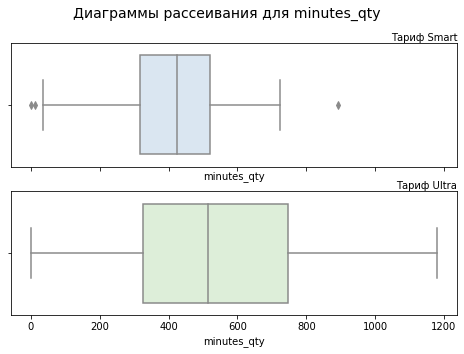

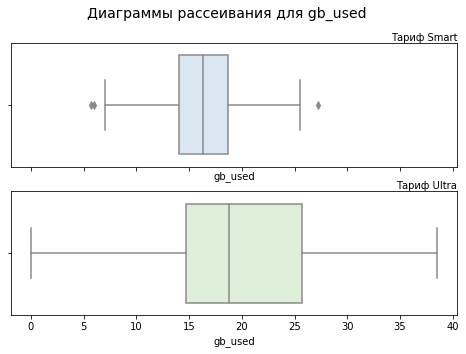

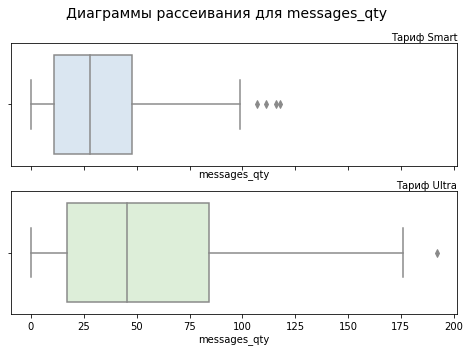

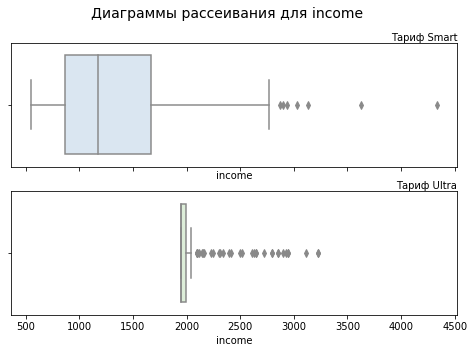

In [21]:
plot_cols = ['minutes_qty', 'gb_used', 'messages_qty', 'income']

for plot_col in plot_cols:
    dataset = df_grouped
    pad = 2
    title_size = 10
    fig, ax = plt.subplots(2,1, sharex=True, figsize = (8, 5))
    ax[0].set_title('Тариф Smart', loc = 'right', pad = pad, size=title_size)
    ax[1].set_title('Тариф Ultra', loc = 'right', pad = pad, size=title_size)
    sns.boxplot(dataset.loc[dataset['tariff'] == 'smart'][plot_col], ax=ax[0], palette=sns.color_palette('Blues', 5))
    sns.boxplot(dataset.loc[dataset['tariff'] == 'ultra'][plot_col], ax=ax[1], palette=sns.color_palette('Greens', 5))
    plt.suptitle('Диаграммы рассеивания для ' + plot_col, size=14)
    
plt.show()


Сгруппируем фрейм по тарифным планам и рассчитаем для каждого тарифного плана среднюю, медиану, дисперсию и стандартное отклонение.

In [22]:
def var1(x): #функция расчета дисперсии для выборки
    return np.var(x, ddof=1)

def std1(x): #функция расчета стандартного отклонения для выборки
    return np.std(x, ddof=1)

In [23]:
stat_data = df_grouped.pivot_table(index='tariff', 
                                   values=['minutes_qty', 'gb_used', 'messages_qty', 'income'], 
                                   aggfunc=(['mean', 'median', var1, std1]))

stat_data.columns = ['_'.join(col) for col in stat_data.columns] #избавляемся от мультииндекса
stat_data = stat_data.reset_index()

stat_data

,tariff,mean_gb_used,mean_income,mean_messages_qty,mean_minutes_qty,median_gb_used,median_income,median_messages_qty,median_minutes_qty,var1_gb_used,var1_income,var1_messages_qty,var1_minutes_qty,std1_gb_used,std1_income,std1_messages_qty,std1_minutes_qty
0,smart,16.308519,1324.401019,32.352078,419.634803,16.333333,1177.116667,27.75,425.062500,12.261503,367285.150014,702.909910,21034.148607,3.501643,606.040551,26.512448,145.031543
1,ultra,19.588446,2086.464659,54.030743,527.821819,18.775000,1950.000000,45.50,514.541667,65.871402,89121.784981,2149.828793,79403.551850,8.116120,298.532720,46.366246,281.786359


Рассчитаем верхнюю и нижнюю границы боксплотов для всех анализируемых параметров, а также количество и долю значений, выходящих за пределы этих границ в разрезе тарифных планов.

Верхнюю и нижнюю границы определим, как 1.5 межквартильного размаха.

In [24]:
def flier_points(dataset, col):
    quantile = pd.DataFrame(dataset[col].quantile([0.25,0.75]))
    up_whisker = quantile.loc[0.75][col] + (quantile.loc[0.75][col] - quantile.loc[0.25][col]) * 1.5
    down_whisker = np.where(quantile.loc[0.25][col] < (quantile.loc[0.75][col] - quantile.loc[0.25][col]) * 1.5, df[col].min(), quantile.loc[0.25][col] - (quantile.loc[0.75][col] - quantile.loc[0.25][col]) * 1.5)
    flier_uppoints_qty = len(dataset.loc[dataset[col] > up_whisker])
    flier_uppoints_share = flier_uppoints_qty / len(dataset)
    flier_downpoints_qty = len(dataset.loc[dataset[col] < down_whisker])
    flier_downpoints_share = flier_downpoints_qty / len(dataset)  
    result.append({'up_whisker' : up_whisker, 'flier_uppoints_qty' : flier_uppoints_qty, 'flier_uppoints_share': flier_uppoints_share, 'down_whisker' : down_whisker, 'flier_downpoints_qty' : flier_downpoints_qty, 'flier_downpoints_share': flier_downpoints_share})

In [25]:
for tariff in tariffs:
    
    filter_col_list = ['minutes_qty', 'gb_used', 'messages_qty']
    result = []

    for filter_col in filter_col_list:
        flier_points(df_grouped.loc[df_grouped['tariff'] == tariff], filter_col)
    
    globals()[tariff] = pd.DataFrame(result, columns=['up_whisker', 'flier_uppoints_qty','flier_uppoints_share', 'down_whisker', 'flier_downpoints_qty', 'flier_downpoints_share'], index=filter_col_list)
    
    display(globals()[tariff])
    print('-----------------------------------------------------------')

,up_whisker,flier_uppoints_qty,flier_uppoints_share,down_whisker,flier_downpoints_qty,flier_downpoints_share
minutes_qty,823.441288,1,0.002857,12.953409090909076,2,0.005714
gb_used,25.729167,1,0.002857,6.9625,2,0.005714
messages_qty,103.500000,4,0.011429,0.0,0,0.000000


-----------------------------------------------------------


,up_whisker,flier_uppoints_qty,flier_uppoints_share,down_whisker,flier_downpoints_qty,flier_downpoints_share
minutes_qty,1379.274306,0,0.000000,0.0,0,0.0
gb_used,42.127841,0,0.000000,0.0,0,0.0
messages_qty,185.125000,1,0.006757,0.0,0,0.0


-----------------------------------------------------------


Для того чтобы убрать аномальных абонетов с нехарактерным потреблением трафика (как в меньшую так и большую сторону), отфильтруем данные по верхней и нижней границам для параметров: минуты, Гб, SMS. 
Фильтровать данные по прибыли (income) не будем, потому что скорее всего высокие значения уйдут после фильтрации выше указанных параметров.

In [26]:
for filter_col in filter_col_list:
    tariff = 'smart'
    df_filtered_1 = df_grouped[(df_grouped['tariff'] == tariff)
                              & (df_grouped[filter_col] <= globals()[tariff].loc[filter_col]['up_whisker'])
                              & (df_grouped[filter_col] >= globals()[tariff].loc[filter_col]['down_whisker'])
                             ]
df_filtered_1

,tariff,user_id,city,gb_used,income,messages_qty,minutes_qty
0,smart,1001,Москва,16.000000,850.000000,0.0,422.000000
1,smart,1002,Стерлитамак,16.714286,1035.714286,10.0,216.714286
2,smart,1005,Набережные Челны,8.583333,827.000000,46.0,550.416667
3,smart,1006,Ульяновск,15.090909,931.818182,0.0,318.272727
4,smart,1007,Москва,14.888889,913.444444,25.0,486.555556
...,...,...,...,...,...,...,...
345,smart,1494,Омск,15.600000,990.600000,0.0,389.200000
346,smart,1496,Вологда,22.500000,2362.583333,39.0,498.666667
347,smart,1497,Челябинск,15.333333,928.333333,17.0,468.666667
348,smart,1498,Владикавказ,18.750000,1659.000000,42.0,323.250000


In [27]:
for filter_col in filter_col_list:
    tariff = 'ultra'
    df_filtered_2 = df_grouped[(df_grouped['tariff'] == tariff)
                              & (df_grouped[filter_col] <= globals()[tariff].loc[filter_col]['up_whisker'])
                              & (df_grouped[filter_col] >= globals()[tariff].loc[filter_col]['down_whisker'])
                             ]
df_filtered_2

,tariff,user_id,city,gb_used,income,messages_qty,minutes_qty
350,ultra,1000,Краснодар,13.625000,1950.0,62.0,320.750000
351,ultra,1003,Москва,11.800000,1950.0,76.0,764.400000
352,ultra,1004,Новокузнецк,18.750000,1950.0,149.0,123.375000
353,ultra,1013,Иваново,15.500000,1950.0,21.0,468.000000
354,ultra,1016,Омск,13.500000,1950.0,71.0,61.000000
...,...,...,...,...,...,...,...
493,ultra,1476,Москва,16.888889,1950.0,5.0,467.111111
494,ultra,1485,Киров,23.000000,1950.0,155.0,584.000000
495,ultra,1491,Челябинск,18.000000,1950.0,48.0,513.333333
496,ultra,1493,Красноярск,27.000000,2850.0,47.0,372.000000


In [28]:
df_filtered = pd.concat([df_filtered_1, df_filtered_2])
df_filtered

,tariff,user_id,city,gb_used,income,messages_qty,minutes_qty
0,smart,1001,Москва,16.000000,850.000000,0.0,422.000000
1,smart,1002,Стерлитамак,16.714286,1035.714286,10.0,216.714286
2,smart,1005,Набережные Челны,8.583333,827.000000,46.0,550.416667
3,smart,1006,Ульяновск,15.090909,931.818182,0.0,318.272727
4,smart,1007,Москва,14.888889,913.444444,25.0,486.555556
...,...,...,...,...,...,...,...
493,ultra,1476,Москва,16.888889,1950.000000,5.0,467.111111
494,ultra,1485,Киров,23.000000,1950.000000,155.0,584.000000
495,ultra,1491,Челябинск,18.000000,1950.000000,48.0,513.333333
496,ultra,1493,Красноярск,27.000000,2850.000000,47.0,372.000000


В ходе фильтрации выбросов ушел 1% абонентов.

Построим гистограммы распределения для анализируемых данных в разрезе тарифных планов.

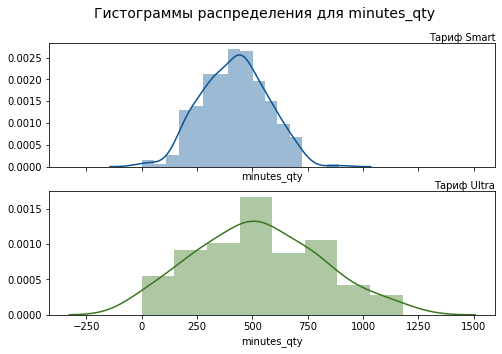

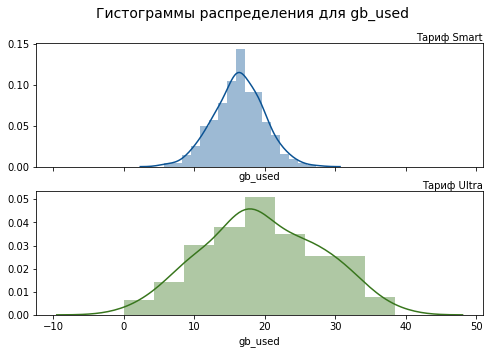

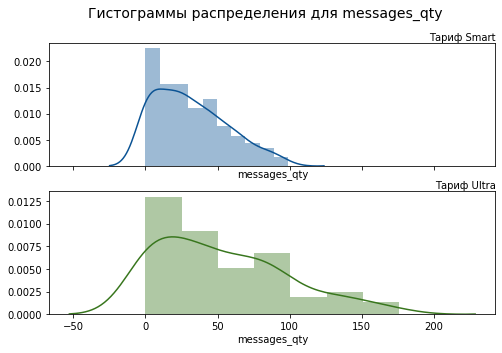

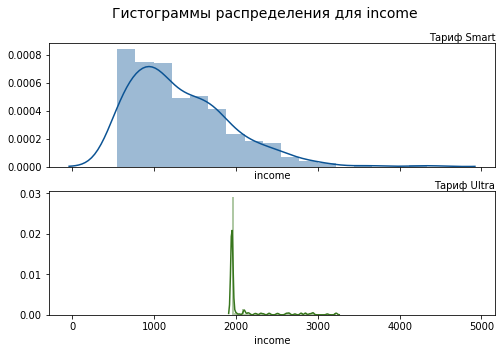

In [29]:
plot_cols = ['minutes_qty', 'gb_used', 'messages_qty', 'income']

for plot_col in plot_cols:
    dataset = df_filtered
    pad = 2
    title_size = 10
    fig, ax = plt.subplots(2,1, sharex=True, figsize = (8, 5))
    ax[0].set_title('Тариф Smart', loc = 'right', pad = pad, size=title_size)
    ax[1].set_title('Тариф Ultra', loc = 'right', pad = pad, size=title_size)
    sns.distplot(dataset.loc[dataset['tariff'] == 'smart'][plot_col], ax=ax[0], color='#0B5394')
    sns.distplot(dataset.loc[dataset['tariff'] == 'ultra'][plot_col], ax=ax[1], color='#38761d')
    plt.suptitle('Гистограммы распределения для ' + plot_col, size=14)
    
plt.show()

По гистограммам можно увидеть, что потребление минут и Гб распределено нормально, в то время как использование SMS и получаемая с абонентов выручка имеют асимметричное распределение - набор данных скошен вправо.

**Вывод**

За 2018 г. абоненты тарифа ultra в представленной выборке принесли всего на 30% меньше выручки, чем абоненты тарифа smart, при этом количество абонентов ultra в 2 раза меньше, чем абонентов smart.
Один абонент ultra приносит на 50% выручки больше, чем один абонент smart, при этом нагрузка на сеть от абонентов ultra только на 20-25% выше, чем от абонентов smart (530 мин и 420 мин соответственно, 19.6 Гб и 16.3 Гб соответственно).

## Проверка гипотез

**Гипотеза №1**

Выдвинем гипотезу: средняя выручка абонентов тарифа Smart и Ultra различаются. Для этой гипотезу сформулируем нулевую гипотезу, которая будет звучать так - средняя выручка абонентов тарифа Smart равна средней выручке абонентов Ultra.
Для проверки этой гипотезу воспользуемся мнетодом scipy.stats.ttest_ind (array1, array2, equal_var).

Зададим пороговое значение на уровне 5%.

Зададим параметр equal_ver = False, поскольку дисперсии совокупностей Smart и Ultra по выручке сильно различаются:
smart = 367285, ultra = 89121.

In [30]:
alpha = 0.05 # критический уровень статистической значимости

results_tariffs = st.ttest_ind(df_filtered[df_filtered['tariff'] == 'smart']['income']
                               , df_filtered[df_filtered['tariff'] == 'ultra']['income']
                               , equal_var=False
                              )

print('p-значение:', results_tariffs.pvalue)

if results_tariffs.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 2.023017931059999e-59
Отвергаем нулевую гипотезу


Получили очень низкое значение p-value, т.е. полученный результат не соответствует гипотезе, значит средняя выручка абонентов Smart и Ultra не равны. 

**Гипотеза №2**

Выдвинем еще одну гипотезу: средняя выручка абонентов из Москвы отличается от выручки абонентов из других регионов. Для этой гипотезу сформулируем нулевую гипотезу, которая будет звучать так - средняя выручка абонентов из Москвы равна выручке абонентов из других регионов.
Для проверки этой гипотезу воспользуемся мнетодом scipy.stats.ttest_ind (array1, array2, equal_var).

Зададим пороговое значение на уровне 5%.

Рассчитаем дисперсию выручки для абонентов Москвы и абонентов других регионов, чтобы задать параметр equal_ver.

In [31]:
df_grouped[df_grouped['city'] == 'Москва']['income'].mean() #средняя выручка абонентов Москвы

1498.465851152215

In [32]:
df_grouped[df_grouped['city'] != 'Москва']['income'].mean() #средняя выручка абонентов других регионов

1563.8822229636141

In [33]:
np.var(df_grouped[df_grouped['city'] == 'Москва']['income'], ddof=1) #Москва

367815.3267880204

In [34]:
np.var(df_grouped[df_grouped['city'] != 'Москва']['income'], ddof=1) #другие регионы

415337.8863947998

Можно сказать, что дисперсии совокупностей примерно равны, поэтому для проверки гипотезы установим параметр equal_ver = True.

In [35]:
alpha = 0.05 # критический уровень статистической значимости

results_cities = st.ttest_ind(df_filtered[df_filtered['city'] == 'Москва']['income']
                              , df_filtered[df_filtered['city'] != 'Москва']['income']
                              , equal_var=True
                             )

print('p-значение:', results_cities.pvalue)

if results_cities.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.3723009963149564
Не получилось отвергнуть нулевую гипотезу


Получили высокое значение p-value, т.е. полученный результат соответствует гипотезе, и значит средняя выручка абонентов из Москвы и других регионов примерно равны. 

**Вывод**

Гипотеза №1 о равенстве средней выручки с абонентов smart и ultra не подтвердилась.

Гипотеза №2 о равенстве средней выручки с абонентов Москвы и других регионов подтвердилась.

## Общий вывод

С точки зрения мобильного оператора тариф ultra является более выгодным: потребление трафика у абонентов ultra в среднем только на 20-25% выше, чем у абонентов smart, но при этом выручки они приносят на 50% больше, чем абоненты smart. 

Абоненты тарифа smart представляют для компании интерес тем, что регулярно выходят в сверхлимитное потребление трафика, и в результате вынуждены оплачивать его по очень высоким тарифам, в результате средняя выручка с абонентов smart только на 50% ниже выручки с абонентов ultra, при том что разница в абонентской плате в 3.5 раза. Это подтверждается также тем фактом, что максимальная достигнутая месячная выручка с абонентов тарифа smart превышает максимум с абонентов ultra - как раз за счет сверхлимитов.

Разница в среднемесячной выручке с абонентов smart и ultra не случайна, что подтверждается результатом проверки гипотезы о равенстве этих значений.

При этом нет особой разницы, в каком городе находится абонент: проверка гипотезы о равенстве среднемесячной выручки с абонентов Москвы и других регионов дала результат, позволяющий сделать такой вывод.